# Bootstrap

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 18

# Example

### You record the time interval between spikes for a neuron, and would like to estimate the spike rate of the neuron from your recordings.

### Assume the actual average spike rate of the neuron is 5 spikes/sec, and simulate what your measured data might look like.

In [13]:
meanSpikeRate = 5  # /sec
interspikeIntervalDist = st.expon(loc=0, scale=1/meanSpikeRate)

simInterspikeIntervals = interspikeIntervalDist.rvs(size=(1000,))

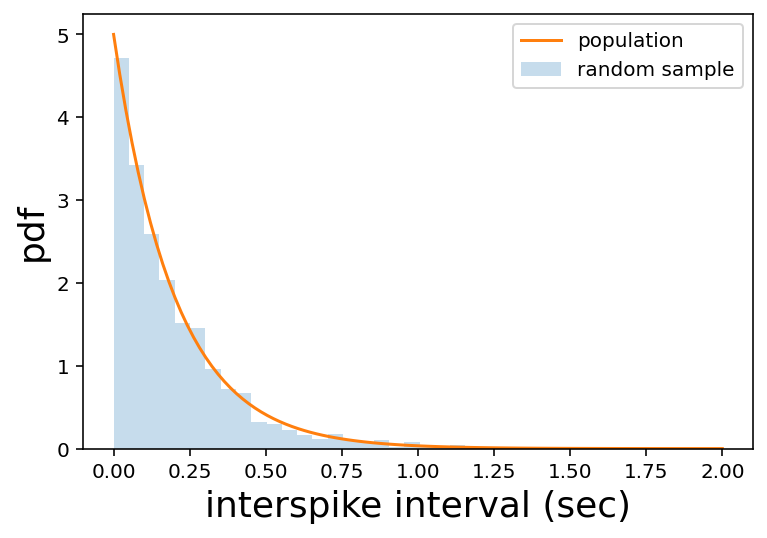

In [14]:
plt.hist(simInterspikeIntervals, bins=30, density=True, alpha=0.25, label='random sample')

intervals = np.linspace(0, 2, 100)  # sec
plt.plot(intervals, interspikeIntervalDist.pdf(intervals), label='population')
plt.xlabel('interspike interval (sec)')
plt.ylabel('pdf')
plt.legend();

### What is your best estimate of the neurons spike rate based on your simulated data?

In [15]:
tau = simInterspikeIntervals.mean()

estMeanSpikeRate = 1 / tau

print(f"Estimate of spike rate is {estMeanSpikeRate :.3f} per second.")

Estimate of spike rate is 5.080 per second.


### What is your best estimate of the neurons interspike interval distribution based on your simulated data?

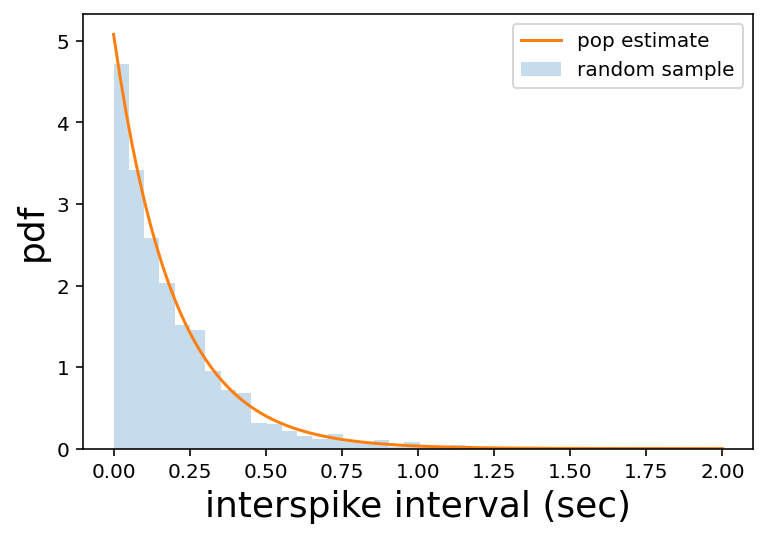

In [16]:
estInterspikeIntervalDist = st.expon(loc=0, scale=1/estMeanSpikeRate)

plt.hist(simInterspikeIntervals, bins=30, density=True, alpha=0.25, label='random sample')
plt.plot(intervals, estInterspikeIntervalDist.pdf(intervals), label='pop estimate')
plt.xlabel('interspike interval (sec)')
plt.ylabel('pdf')
plt.legend();

### How confident are you in your estimated spike rate?

### Construct a 95% bootstrap confidence interval (i.e. an interval of spike rates that you are 95% sure contains the neuron's true average spike rate).

### But first, an example of random choice with replacement.

In [9]:
x = list(range(6))
print(x)

[0, 1, 2, 3, 4, 5]


In [10]:
# Five random selections of the same size as x with replacement.
for i in range(5):
    x2 = np.random.choice(x, size=len(x), replace=True)
    print(x2)

[1 4 4 0 4 1]
[3 5 1 2 5 1]
[2 0 5 3 1 0]
[1 5 5 4 1 4]
[5 0 3 4 2 5]


### Ok, now construct a 95% bootstrap confidence interval (i.e. an interval of spike rates that you are 95% sure contains the neuron's true average spike rate).

In [17]:
numObservations = len(simInterspikeIntervals)
numBootstrapSamples = 1000

# create memory for estimated spike rate from each bootstrap sample set
bootstrapMeanSpikeRates = np.zeros((numBootstrapSamples,))

# Create each bootstrap sample set from the original observations
# and compute its estimated spike rate
for i in range(numBootstrapSamples):
    bootstrapInterspikeIntervals = np.random.choice(simInterspikeIntervals, 
                                                    size=simInterspikeIntervals.shape, replace=True)
    bootstrapTau = bootstrapInterspikeIntervals.mean()
    bootstrapMeanSpikeRates[i] = 1 / bootstrapTau

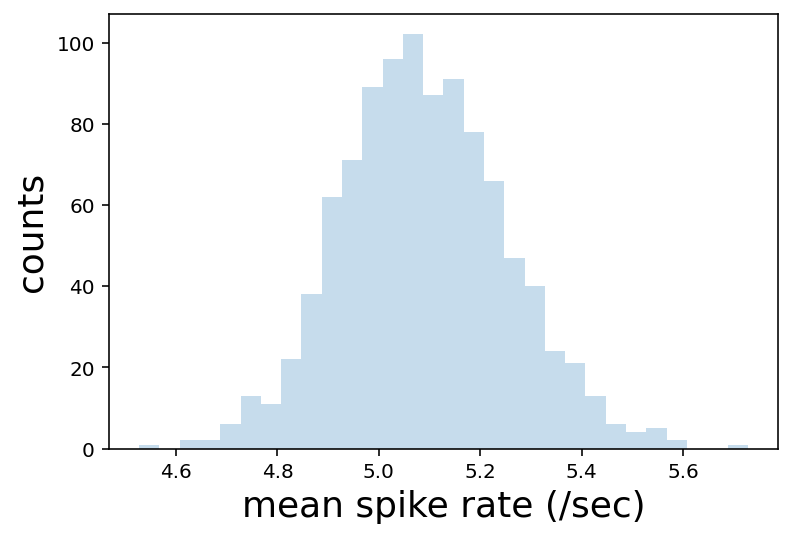

In [19]:
# plot histogram of bootstrapped spike rates
plt.hist(bootstrapMeanSpikeRates, 30, alpha=0.25)
plt.xlabel('mean spike rate (/sec)')
plt.ylabel('counts');

### Find the 2.5% and 97.5% quantiles from your bootstrapped spike rates.

### These will be the 95% confidence limits.

In [25]:
lb, ub = np.quantile(bootstrapMeanSpikeRates, [0.025, 0.975])

print(f"Best estimate of mean spike rate is {estMeanSpikeRate :.3f} /sec.")
print(f"95% confidence interval within {lb :.3f} to {ub :.3f} /sec.")

Best estimate of mean spike rate is 5.080 /sec.
95% confidence interval within 4.773 to 5.418 /sec.


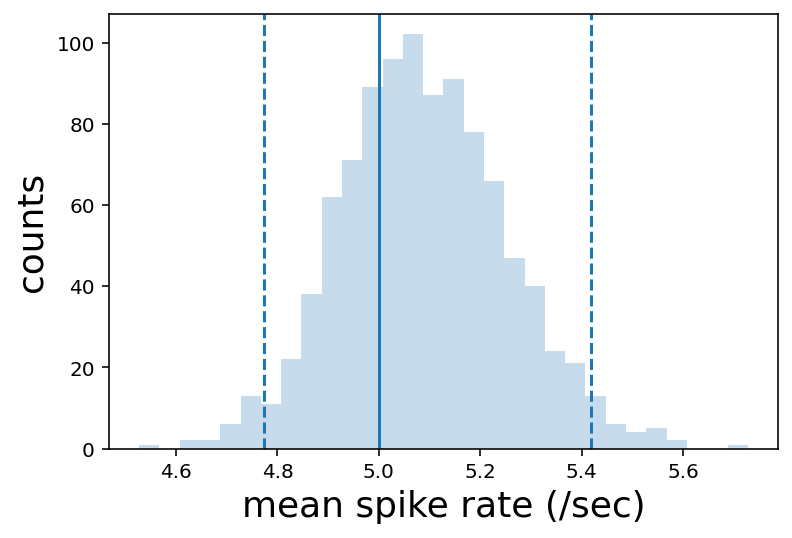

In [24]:
plt.hist(bootstrapMeanSpikeRates, 30, alpha=0.25)
plt.axvline(meanSpikeRate)
plt.axvline(lb, linestyle='--')
plt.axvline(ub, linestyle='--')
plt.xlabel('mean spike rate (/sec)')
plt.ylabel('counts');

# <font color=red>Exercise</font>

### You measure a protein's expression level for a series of cells, and would like to estimate both the distribution of expression levels in the entire cell population in this brain region and your confidence in your estimated distribution parameters.

### Assume that expression levels are normally distributed with an average expression level of 50 and standard deviation of 10 across cells. Simulate what your measured data set might look like for 100 observations and plot it with the assumed distribution shown for reference.

In [ ]:
exprLevelDist = ...
simMeasuredExprLevels = ...

In [ ]:
plt.hist(simMeasuredExprLevels, 30, density=True, alpha=0.25, label='measured')
x = np.linspace(1, 100, 100)
plt.plot(x, exprLevelDist.pdf(x), label='population')
plt.xlabel('protein cellular expression level')
plt.ylabel('pdf')
plt.legend();

### What is your best estimate for the mean and variance in expression level in the simulated sample?

In [ ]:
meanExprLevel = ...
stdExprLevel = ...

print(f"Mean expression level per cell in sample is {meanExprLevel :.1f}")
print(f"Standard deviation in expression levels across cells in sample is {stdExprLevel :.1f}")

### Using Central Limit Theorem, what is your best estimate for the 95% confidence interval in our estimate of the population's mean expression level?

In [ ]:
sem = stdExprLevel / np.sqrt(100)

print(f"Estimate of mean expression level per cell in population is {meanExprLevel :.1f} ± {1.96 * sem :.1f}")

### Use bootstrap to estimate the confidence interval on both your estimate of the mean and standard deviation.

In [35]:
numBootstrapSamples = 1000

bootstrapMeans = np.zeros((numBootstrapSamples,))
bootstrapStdevs = ...

for i in range(numBootstrapSamples):
    bootstrapSample = ...
    bootstrapMeans[i] = bootstrapSample.mean()
    bootstrapStdevs[i] = bootstrapSample.std()

bootstrapMeanCI = np.quantile(bootstrapMeans, [0.025, 0.975])
bootstrapStdevCI = ...

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(bootstrapMeans, bins=30, alpha=0.5)
plt.axvline(meanExprLevel)
plt.axvline(bootstrapMeanCI[0], linestyle='--')
plt.axvline(bootstrapMeanCI[1], linestyle='--')
plt.xlabel('mean protein expr level')
plt.ylabel('counts');
plt.subplot(1, 2, 2)
plt.hist(bootstrapStdevs, bins=30, alpha=0.5)
plt.axvline(stdExprLevel)
plt.axvline(bootstrapStdevCI[0], linestyle='--')
plt.axvline(bootstrapStdevCI[1], linestyle='--')
plt.xlabel('stdev of protein expr level')
plt.ylabel('counts');